In [36]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


df = pd.read_csv('/content/sample_data/Loan_Default.csv')
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [37]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

In [38]:
df.duplicated().sum()

np.int64(0)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   credit_worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  interest_rate_spread       112031 non-null  float64
 13  upfront_charges            10

In [40]:
df.isna().sum() / len(df) * 100

,0
id,0.000000
year,0.000000
loan_limit,2.249277
gender,0.000000
approv_in_adv,0.610749
loan_type,0.000000
loan_purpose,0.090133
credit_worthiness,0.000000
open_credit,0.000000
business_or_commercial,0.000000


In [41]:
df['total_units'].unique()

array(['1U', '2U', '3U', '4U'], dtype=object)

In [42]:
df['total_units'] = df['total_units'].str.replace("U", "", regex=False).astype(int)
print(df["total_units"].unique())
print(df["total_units"].dtype)

[1 2 3 4]
int64


In [43]:
df['age'].unique()

array(['25-34', '55-64', '35-44', '45-54', '65-74', '>74', '<25', nan],
      dtype=object)

In [44]:
df['loan_purpose'].unique()

array(['p1', 'p4', 'p3', 'p2', nan], dtype=object)

In [45]:
df['submission_of_application'].unique()

array(['to_inst', 'not_inst', nan], dtype=object)

In [46]:
df['interest_rate_spread'].unique()

array([    nan,  0.2   ,  0.681 , ..., -0.9199,  0.7874, -0.3247])

In [47]:
df['upfront_charges'].unique()

array([    nan,  595.  ,    0.  , ..., 3113.06, 1226.64, 4323.33])

In [48]:
df['loan_limit'].unique()

array(['cf', nan, 'ncf'], dtype=object)

In [49]:
df['term'].unique()

array([360., 300., 180., 312., 144., 240., 348., 324., 120.,  96., 192.,
       156., 228., 336., 288., 108., 276.,  nan, 132., 216., 168., 204.,
       264., 252., 165., 280., 322.])

In [50]:
df['neg_ammortization'].unique()

array(['not_neg', 'neg_amm', nan], dtype=object)

In [51]:
df['ltv'].unique()

array([ 98.72881356,          nan,  80.01968504, ..., 151.8145161 ,
        41.49550706,  32.80201342])

In [52]:
df['income'] = df['income'].fillna(df['income'].median())
df['interest_rate_spread'] = df['interest_rate_spread'].fillna(df['interest_rate_spread'].median())
df['rate_of_interest'] = df['rate_of_interest'].fillna(df['rate_of_interest'].median())
df['upfront_charges'] = df['upfront_charges'].fillna(df['upfront_charges'].median())
df['term'] = df['term'].fillna(df['term'].median())
df['dtir1'] = df['dtir1'].fillna(df['dtir1'].median())
df['ltv'] = df['ltv'].fillna(df['ltv'].median())
df['property_value'] = df['property_value'].fillna(df['property_value'].median())
df['loan_purpose'] = df['loan_purpose'].fillna("unknown")
df['age'] = df['age'].fillna("unknown")
df['neg_ammortization'] = df['neg_ammortization'].fillna("unknown")
df['approv_in_adv'] = df['approv_in_adv'].fillna("unknown")
df['submission_of_application'] = df['submission_of_application'].fillna("unknown")
df['loan_limit'] = df['loan_limit'].fillna("unknown")

In [53]:
df.isna().sum() / len(df) * 100

,0
id,0.0
year,0.0
loan_limit,0.0
gender,0.0
approv_in_adv,0.0
loan_type,0.0
loan_purpose,0.0
credit_worthiness,0.0
open_credit,0.0
business_or_commercial,0.0


In [54]:
df['status'].value_counts(normalize=True)

,proportion
status,
0,0.753555
1,0.246445


In [55]:
df[['credit_score', 'income', 'loan_amount', 'rate_of_interest', 'dtir1', 'ltv']].describe()

,credit_score,income,loan_amount,rate_of_interest,dtir1,ltv
count,148670.000000,148670.000000,1.486700e+05,148670.000000,148670.000000,148670.000000
mean,699.789103,6883.647811,3.311177e+05,4.031879,37.938508,72.989111
std,115.875857,6300.067060,1.839093e+05,0.488348,9.663417,37.890714
min,500.000000,0.000000,1.650000e+04,0.000000,5.000000,0.967478
25%,599.000000,3840.000000,1.965000e+05,3.750000,33.000000,63.297872
50%,699.000000,5760.000000,2.965000e+05,3.990000,39.000000,75.135870
75%,800.000000,8280.000000,4.365000e+05,4.250000,44.000000,84.722222
max,900.000000,578580.000000,3.576500e+06,8.000000,61.000000,7831.250000


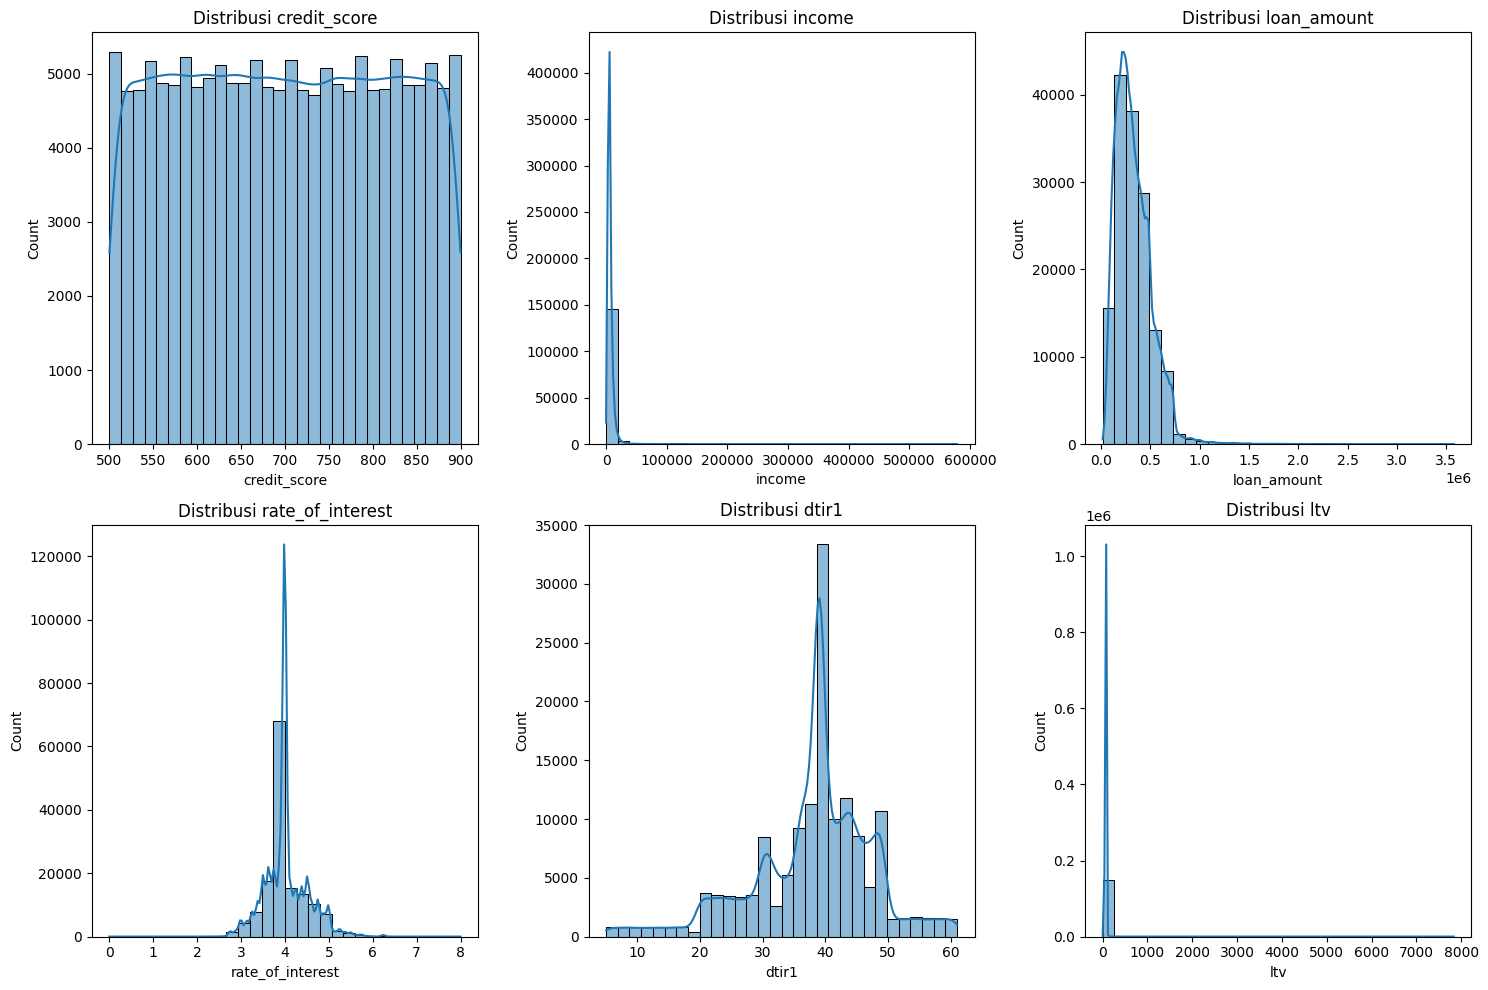

In [56]:
num_cols = ['credit_score', 'income', 'loan_amount', 'rate_of_interest', 'dtir1', 'ltv']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

This histogram shows that:

- **Credit Score** is generally stable, ranging from 500 to 900.
- **Income** is concentrated in the low to mid-level range.
- **Loan Amount** is mostly under 500,000.
- **Rate of Interest** tends to be stable around 4%.
- **Debt-to-Income Ratio (DTIR)** is mostly between 30 and 50, which is considered normal.
- **Loan-to-Value (LTV)** has some values exceeding 1000, which may indicate data issues or high-risk loans that require further analysis.

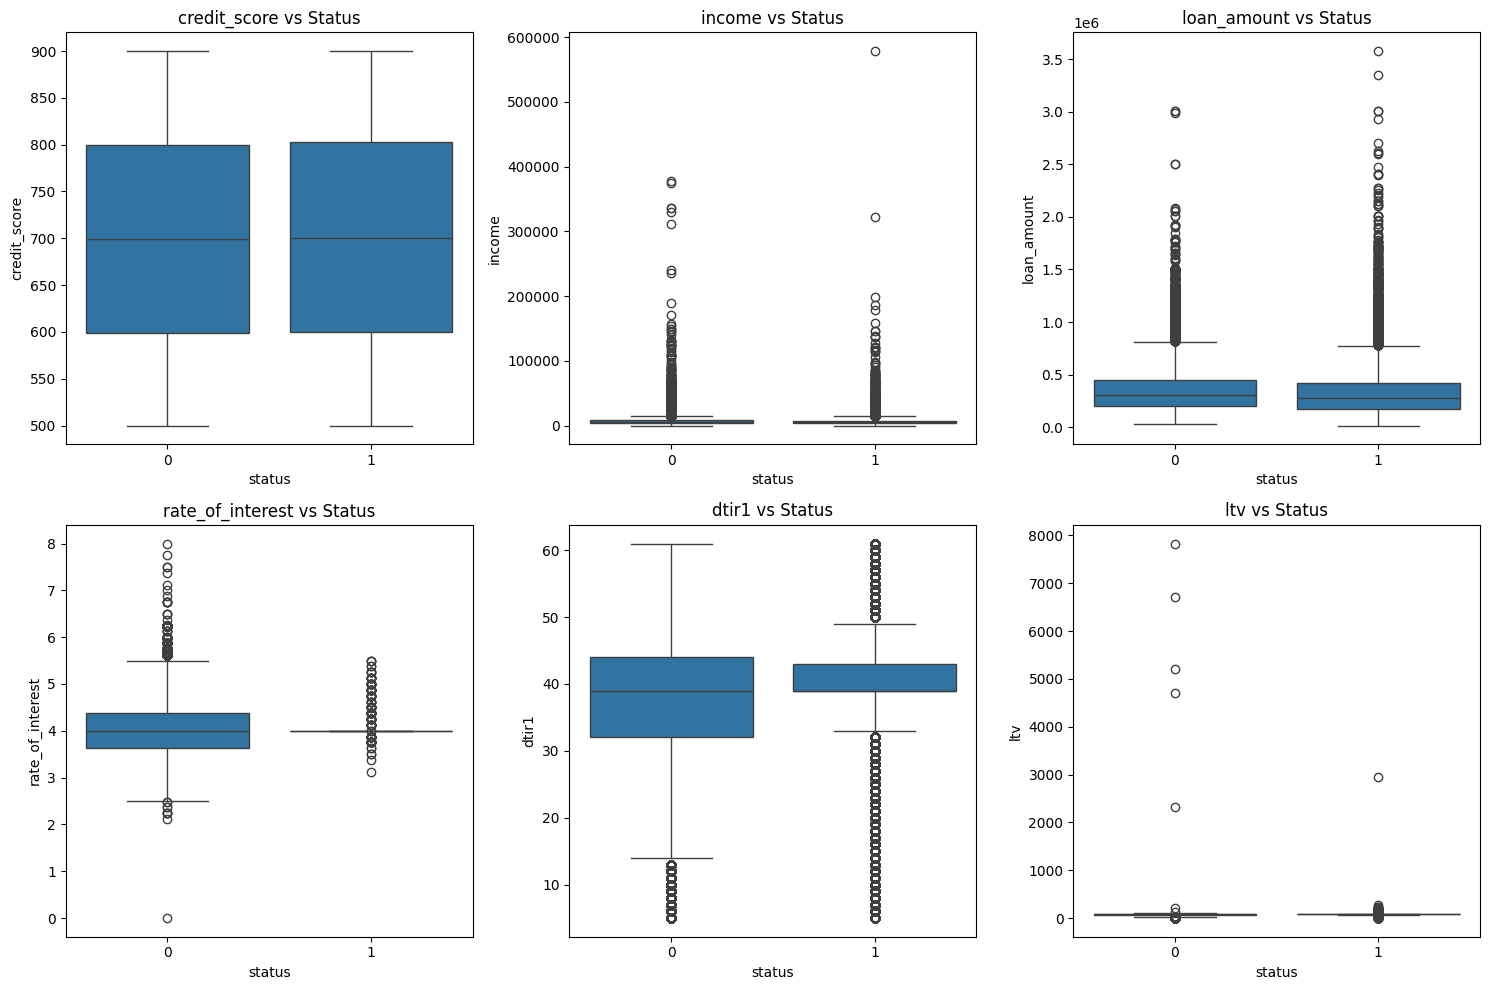

In [57]:
num_cols = ['credit_score', 'income', 'loan_amount', 'rate_of_interest', 'dtir1', 'ltv']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='status', y=col, data=df)
    plt.title(f'{col} vs Status')
plt.tight_layout()
plt.show()

This boxplot shows that:
- Credit score appears similar between default and non-default → likely not a strong predictor.
- Income & loan amount are higher in default group → potential risk factors.
- Higher interest rates, DTIR, and LTV are more common in defaulters → may increase default risk.

In [58]:
df.describe()

,id,year,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,property_value,total_units,income,credit_score,ltv,status,dtir1
count,148670.000000,148670.0,1.486700e+05,148670.000000,148670.000000,148670.000000,148670.000000,1.486700e+05,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000
mean,99224.500000,2019.0,3.311177e+05,4.031879,0.429024,3057.397919,335.143438,4.897800e+05,1.021679,6883.647811,699.789103,72.989111,0.246445,37.938508
std,42917.476598,0.0,1.839093e+05,0.488348,0.445907,2797.972965,58.402488,3.420221e+05,0.198521,6300.067060,115.875857,37.890714,0.430942,9.663417
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,1.000000,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.750000,0.181500,1250.000000,360.000000,2.880000e+05,1.000000,3840.000000,599.000000,63.297872,0.000000,33.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,1.000000,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.250000,0.620000,3889.495000,360.000000,5.980000e+05,1.000000,8280.000000,800.000000,84.722222,0.000000,44.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,4.000000,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [59]:
df.groupby('status')[['credit_score', 'income', 'loan_amount', 'rate_of_interest', 'dtir1', 'ltv']].mean()

,credit_score,income,loan_amount,rate_of_interest,dtir1,ltv
status,,,,,,
0,699.523793,7102.046041,334990.774875,4.044931,37.482965,72.064812
1,700.600344,6215.851961,319275.184912,3.991968,39.331423,75.815339


Groupby output shows that:

- **Credit Score**: Not a strong predictor of default.
- **Income**, **DTIR1**, and **LTV**: Higher values are associated with increased default risk.
- **Loan Amount**: A potential risk factor for default.
- **Rate of Interest**: Appears less significant based on mean comparison.

In [60]:
num_cols = ['credit_score', 'income', 'loan_amount', 'rate_of_interest', 'dtir1', 'ltv']
num_cols

['credit_score', 'income', 'loan_amount', 'rate_of_interest', 'dtir1', 'ltv']

In [61]:
def ttest(column):
  status_0 = df[df['status'] == 0][column]
  status_1 = df[df['status'] == 1][column]

  stat, p = stats.ttest_ind(status_0, status_1)
  print(f'Processing column: {column}')
  print(f't-statistic: {stat}')
  print(f'p-value: {p}')

  if p < 0.05:
    print(f'{column} is significant to default')
  else:
    print(f'{column} is not significant to default')
  print()
  return status_0, status_1

In [62]:
for col in num_cols:
    result = ttest(col)

Processing column: credit_score
t-statistic: -1.5437361122829274
p-value: 0.12265440254169067
credit_score is not significant to default

Processing column: income
t-statistic: 23.415899383258807
p-value: 4.882969759627964e-121
income is significant to default

Processing column: loan_amount
t-statistic: 14.208539142794285
p-value: 8.69062767980642e-46
loan_amount is significant to default

Processing column: rate_of_interest
t-statistic: 18.040546368030164
p-value: 1.1195908811448796e-72
rate_of_interest is significant to default

Processing column: dtir1
t-statistic: -31.892407549643437
p-value: 1.9292349024820293e-222
dtir1 is significant to default

Processing column: ltv
t-statistic: -16.462003778070088
p-value: 7.788581645278733e-61
ltv is significant to default



T-test results show that only **Credit Score** is not statistically significant to default, which aligns with the previous analysis.  
All other features tested — **Income**, **Loan Amount**, **Rate of Interest**, **DTIR1**, and **LTV** — are statistically significant and contribute to the potential of default.

In [65]:
features = ['income', 'loan_amount', 'rate_of_interest', 'dtir1', 'ltv']
target = 'status'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba_rf):.4f}")

[[21103  1391]
 [ 1216  6024]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     22494
           1       0.81      0.83      0.82      7240

    accuracy                           0.91     29734
   macro avg       0.88      0.89      0.88     29734
weighted avg       0.91      0.91      0.91     29734

ROC AUC Score: 0.9758


Random Forest model achieves a **98% ROC AUC score**, showing strong prediction performance.  
The model can effectively distinguish between default and non-default cases.

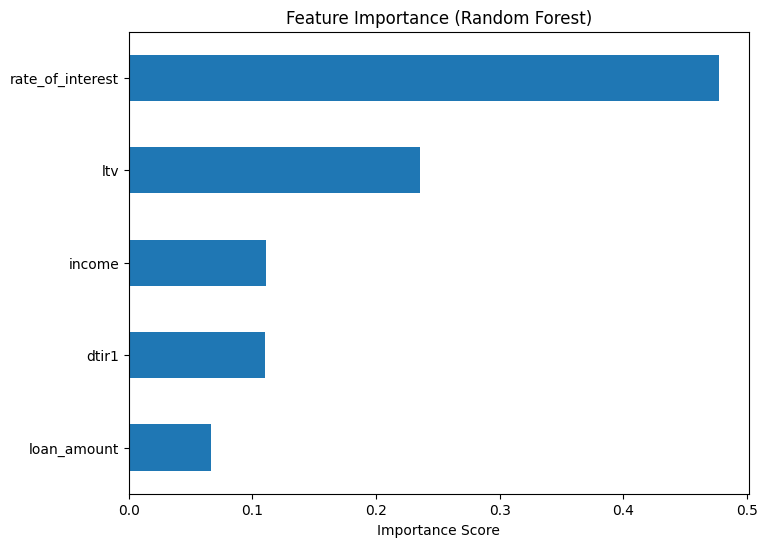

In [67]:
feature_importance = pd.Series(rf_model.feature_importances_, index=features)
feature_importance.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.show()

Feature importance shows that *Rate of Interest* is the most influential feature (≈ 0.5), indicating a strong impact on predicting default.  
Meanwhile, *Loan Amount* has the lowest importance (< 0.1), suggesting less influence in the model.